# Imports

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

# Load the data


In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
num_classes = 10

print 'Train size:', x_train.shape[0]
print 'Test size:', x_test.shape[0]

Train size: 60000
Test size: 10000


In [52]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

for l in model.layers:
    print l.name, l.input_shape,'==>',l.output_shape
print
print model.summary()

dense_57 (None, 784) ==> (None, 512)
dense_58 (None, 512) ==> (None, 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_58 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


# Train the network

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s - loss: 0.0282 - acc: 0.9914 - val_loss: 0.0709 - val_acc: 0.9786
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.0216 - acc: 0.9936 - val_loss: 0.0694 - val_acc: 0.9800
Epoch 3/20
60000/60000 [==============================] - 4s - loss: 0.0163 - acc: 0.9954 - val_loss: 0.0696 - val_acc: 0.9806
Epoch 4/20
60000/60000 [==============================] - 4s - loss: 0.0129 - acc: 0.9962 - val_loss: 0.0639 - val_acc: 0.9813
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0101 - acc: 0.9969 - val_loss: 0.0801 - val_acc: 0.9803
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.0082 - acc: 0.9977 - val_loss: 0.0777 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 4s - loss: 0.0060 - acc: 0.9982 - val_loss: 0.0706 - val_acc: 0.9831
Epoch 8/20
60000/60000 [==============================] - 3s 

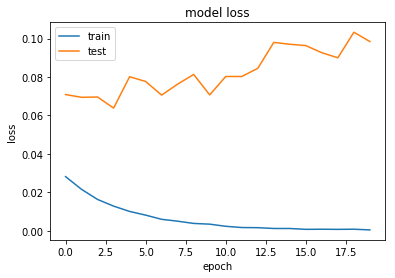

In [55]:
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print
print 'Test loss:', round(score[0], 3)
print 'Test accuracy:', round(score[1], 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Build networks using all activations

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s - loss: 0.3789 - acc: 0.8897 - val_loss: 0.3093 - val_acc: 0.9110
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.3083 - acc: 0.9144 - val_loss: 0.2901 - val_acc: 0.9196
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.2955 - acc: 0.9177 - val_loss: 0.3073 - val_acc: 0.9192
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.2873 - acc: 0.9203 - val_loss: 0.2994 - val_acc: 0.9180
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.2818 - acc: 0.9215 - val_loss: 0.2772 - val_acc: 0.9234
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.2784 - acc: 0.9229 - val_loss: 0.3133 - val_acc: 0.9120
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.2758 - acc: 0.9236 - val_loss: 0.3010 - val_acc: 0.9187
Epoch 8/20
60000/60000 [==============================] - 3s 

60000/60000 [==============================] - 3s - loss: 0.0681 - acc: 0.9792 - val_loss: 0.0836 - val_acc: 0.9727
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.0496 - acc: 0.9853 - val_loss: 0.0628 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0667 - val_acc: 0.9796
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0679 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0218 - acc: 0.9937 - val_loss: 0.0638 - val_acc: 0.9810
Epoch 8/20
60000/60000 [==============================] - 3s - loss: 0.0169 - acc: 0.9949 - val_loss: 0.0698 - val_acc: 0.9805
Epoch 9/20
60000/60000 [==============================] - 3s - loss: 0.0131 - acc: 0.9962 - val_loss: 0.0650 - val_acc: 0.9838
Epoch 10/20
60000/60000 [==============================] - 3s - loss: 0.0099 - acc: 0.9972 - val_loss: 0.0700 - val_acc: 0

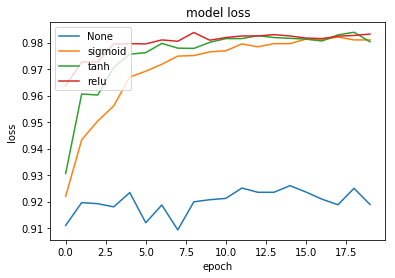

In [45]:
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_acc'])
    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')